In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import geopandas
import plot_utils
import mpl_toolkits

In [3]:
# Read data into a pandas dataframe
ld = pd.read_csv("OfficeWarehouse.csv", encoding="ISO-8859-1")

In [4]:
print(ld.columns) #See what I'm working with

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Returned'],
      dtype='object')


In [100]:
states = {} #[state][statesprofit]
stateCount = {} #[state][statecount]

for i in range(len(ld)):
    line = ld.loc[i]
    if line["State"] not in states:
        states.update({line["State"]: line["Profit"]})
        stateCount.update({line["State"]: 1})
    else:
        states.update({line["State"] : (states.get(line["State"]) + line["Profit"])})
        stateCount.update({line["State"] : stateCount.get(line["State"]) + 1})
    
sortedStates = sorted(states.items(), key=lambda x:x[1], reverse=True)
print(states)
print('\n')
print(stateCount)
print('\n')
print(sortedStates)
print('\n')

{'Kentucky': 11199.696600000005, 'California': 76381.38710000017, 'Florida': -3399.3017, 'North Carolina': -7490.912200000003, 'Washington': 33402.651699999995, 'Texas': -25729.3563, 'Wisconsin': 8401.800399999998, 'Utah': 2546.5335000000005, 'Nebraska': 2037.0942000000007, 'Pennsylvania': -15559.960300000013, 'Illinois': -12607.88699999998, 'Minnesota': 10823.1874, 'Michigan': 24463.187599999994, 'Delaware': 9977.374800000001, 'Indiana': 18382.936300000005, 'New York': 74038.54860000005, 'Arizona': -3427.9246, 'Virginia': 18597.9504, 'Tennessee': -5341.6936, 'Alabama': 5786.825299999999, 'South Carolina': 1769.0566000000003, 'Oregon': -1190.4704999999992, 'Colorado': -6527.857900000001, 'Iowa': 1183.8119000000002, 'Ohio': -16971.376600000018, 'Missouri': 6436.210499999999, 'Oklahoma': 4853.956, 'New Mexico': 1157.1161, 'Louisiana': 2196.102300000001, 'Connecticut': 3511.4918000000002, 'New Jersey': 9772.9138, 'Massachusetts': 6785.501600000005, 'Georgia': 16250.043300000003, 'Nevada':

In [99]:
statesMap = geopandas.read_file('cb_2014_us_state_5m/cb_2014_us_state_5m.shp')
# print(statesMap)

In [164]:
validStates = statesMap[0:0] #allows me to add line by line, so no rows are skipped
count = 0
for i in range(len(statesMap)):
    if statesMap.loc[i]['STATEFP'] not in ['02', '66', '60', '69', '72', '78', '15']:
        validStates.loc[count] = (statesMap.loc[i])
        count += 1
#     print(statesMap.loc[i])


# validStates = statesMap[~statesMap['STATEFP'].isin(['02', '66', '60', '69', '72', '78', '15'])]
# print(statesMap[['STATEFP', 'NAME']])
print(validStates[['STATEFP', 'NAME']])

   STATEFP                  NAME
0       04               Arizona
1       05              Arkansas
2       06            California
3       09           Connecticut
4       12               Florida
5       13               Georgia
6       16                 Idaho
7       17              Illinois
8       19                  Iowa
9       20                Kansas
10      22             Louisiana
11      24              Maryland
12      27             Minnesota
13      28           Mississippi
14      29              Missouri
15      31              Nebraska
16      32                Nevada
17      34            New Jersey
18      36              New York
19      38          North Dakota
20      39                  Ohio
21      42          Pennsylvania
22      45        South Carolina
23      46          South Dakota
24      48                 Texas
25      49                  Utah
26      51              Virginia
27      56               Wyoming
28      41                Oregon
29      54

In [165]:
# validStates.plot(figsize=(20,20))

In [166]:
#validStates['Profit'] = states.values()
#validStates.plot(columns='Profit')

fips2state = {"01": "AL", "02": "AK", "04": "AZ", "05": "AR", "06": "CA","08": "CO", "09": "CT", "10": "DE", "11": "DC", "12": "FL","13": "GA", "15": "HI", "16": "ID", "17": "IL", "18": "IN","19": "IA", "20": "KS", "21": "KY", "22": "LA", "23": "ME","24": "MD", "25": "MA", "26": "MI", "27": "MN", "28": "MS","29": "MO", "30": "MT", "31": "NE", "32": "NV", "33": "NH","34": "NJ", "35": "NM", "36": "NY", "37": "NC", "38": "ND","39": "OH", "40": "OK", "41": "OR", "42": "PA", "44": "RI","45": "SC", "46": "SD", "47": "TN", "48": "TX", "49": "UT","50": "VT", "51": "VA", "53": "WA", "54": "WV", "55": "WI","56": "WY",  # dictionary mapping FIPS code to state abbreviation
    }

translation = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'
        }
for element in fips2state:
    fips2state.update({element:translation[fips2state[element]]})


print(states)

{'Kentucky': 11199.696600000005, 'California': 76381.38710000017, 'Florida': -3399.3017, 'North Carolina': -7490.912200000003, 'Washington': 33402.651699999995, 'Texas': -25729.3563, 'Wisconsin': 8401.800399999998, 'Utah': 2546.5335000000005, 'Nebraska': 2037.0942000000007, 'Pennsylvania': -15559.960300000013, 'Illinois': -12607.88699999998, 'Minnesota': 10823.1874, 'Michigan': 24463.187599999994, 'Delaware': 9977.374800000001, 'Indiana': 18382.936300000005, 'New York': 74038.54860000005, 'Arizona': -3427.9246, 'Virginia': 18597.9504, 'Tennessee': -5341.6936, 'Alabama': 5786.825299999999, 'South Carolina': 1769.0566000000003, 'Oregon': -1190.4704999999992, 'Colorado': -6527.857900000001, 'Iowa': 1183.8119000000002, 'Ohio': -16971.376600000018, 'Missouri': 6436.210499999999, 'Oklahoma': 4853.956, 'New Mexico': 1157.1161, 'Louisiana': 2196.102300000001, 'Connecticut': 3511.4918000000002, 'New Jersey': 9772.9138, 'Massachusetts': 6785.501600000005, 'Georgia': 16250.043300000003, 'Nevada':

In [167]:

validStatesProfits = []
validStatesProfitPerCount = []
# sortedStateCount = sorted(stateCount) #Names of the states in alphabetical orter
# print(stateCount)
# for s in sortedStateCount:
#     print(stateCount[s])


for i in range(len(states)):
    try:
        validStatesProfits.append(states.get(fips2state[validStates.loc[i]['STATEFP']]))
        validStatesProfitPerCount.append(states.get(fips2state[validStates.loc[i]['STATEFP']]) / stateCount.get(fips2state[validStates.loc[i]['STATEFP']]))
    except:
        print('error')
        validStatesProfits.append(0)
        validStatesProfitPerCount.append(0)
#         continue
        


validStates['Profit'] = validStatesProfits
validStates['ProfitPerCount'] = validStatesProfitPerCount
# print(sortedStateCount)
# validStates.loc[1]['Profit'] = states[fips2state[validStates.loc[1]['STATEFP']]]
# print(validStates)
# validStates['Profit'] = validStatesProfits
# print(validStates['COUNTYNS'])
# print(validStates)

46.4804
    ProfitPerCount                  NAME      Profit STATEFP
0       -15.303235               Arizona  -3427.9246      04
1        66.811452              Arkansas   4008.6871      05
2        38.171608            California  76381.3871      06
3        42.823071           Connecticut   3511.4918      09
4        -8.875461               Florida  -3399.3017      12
5        88.315453               Georgia  16250.0433      13
6        39.367767                 Idaho    826.7231      16
7       -25.625787              Illinois -12607.8870      17
8        39.460397                  Iowa   1183.8119      19
9        34.851813                Kansas    836.4435      20
10       52.288150             Louisiana   2196.1023      22
11       66.963608              Maryland   7031.1788      24
12      121.608847             Minnesota  10823.1874      27
13       59.867475           Mississippi   3172.9762      28
14       97.518341              Missouri   6436.2105      29
15       53.6077

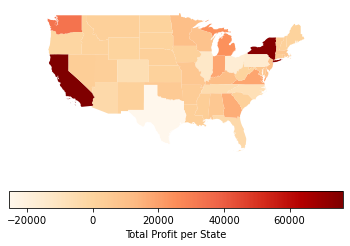

In [168]:
# validStates.loc[np.random.choice(validStates.index, 40), 'Profit'] = np.nan
fig, ax = plt.subplots(1, 1)
validStates.plot(column='Profit', figsize=(45,45), ax=ax, legend = True, cmap='OrRd', legend_kwds={'label': "Total Profit per State", 'orientation': "horizontal"})
plt.axis("off")

# print(validStates['Profit'])
# print("\n")
print(states.get(fips2state[validStates.loc[29]['STATEFP']]) / stateCount.get(fips2state[validStates.loc[29]['STATEFP']]))
print(validStates[['ProfitPerCount', 'NAME', 'Profit', 'STATEFP']])
# print(validStates.loc[52])

(-127.62233794999999, -64.06073105, 23.2714922, 50.6278278)

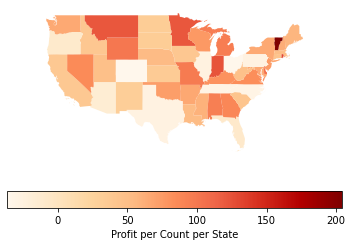

In [169]:
fig, ax = plt.subplots(1, 1)
validStates.plot(column='ProfitPerCount', figsize=(45,45), ax=ax, legend = True, cmap='OrRd', legend_kwds={'label': "Profit per Count per State", 'orientation': "horizontal"})
plt.axis("off")
# validStates.explore(
#      column="ProfitPerCount", 
#      cmap='OrRd',
#      tooltip=["NAME","ProfitPerCount"], 
#      popup=True,
#      tiles="CartoDB positron",
#      style_kwds=dict(color="black") # use black outline
# )